In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.isna().sum()

ConvertedCompYearly         0
Age                         8
YearsCode                  11
YearsCodePro               20
Country                     0
EdLevel                     0
DevType                     4
Employment                  0
LanguageHaveWorkedWith      0
DatabaseHaveWorkedWith      0
PlatformHaveWorkedWith      0
WebframeHaveWorkedWith      0
ToolsTechHaveWorkedWith     0
dtype: int64

In [3]:
data['YearsCodePro'] = data['YearsCodePro'].str.extract(r'(\d+)') 
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')  
max(data['YearsCodePro'])

50.0

In [4]:
# Shuffle các hàng trong DataFrame
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
len(data[data['YearsCodePro'].isna()])


20

In [7]:
data = data.dropna(subset=['YearsCodePro'])

In [8]:
data[data['EdLevel'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [9]:
data[data['Country'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [10]:
data[data['Employment'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [11]:
data.dtypes

ConvertedCompYearly        float64
Age                         object
YearsCode                   object
YearsCodePro               float64
Country                     object
EdLevel                     object
DevType                     object
Employment                  object
LanguageHaveWorkedWith      object
DatabaseHaveWorkedWith      object
PlatformHaveWorkedWith      object
WebframeHaveWorkedWith      object
ToolsTechHaveWorkedWith     object
dtype: object

In [12]:
import re

def extract_average_age(age_str):
    if isinstance(age_str, str):
        match = re.match(r'(\d+)-(\d+)', age_str)
        if match:
            lower, upper = map(int, match.groups())
            if ((lower + upper)/2) %2==0 :
                return ((lower + upper) / 2)
            else:
                return (lower+upper)/2+0.5
    return None 

data['Age'] = data['Age'].apply(extract_average_age)


In [13]:
data = data.dropna() #về sau sửa đoạn này

In [14]:
data['YearsCode'] = data['YearsCode'].str.extract(r'(\d+)') 
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')  

Vẽ biểu đồ và phân tích

In [15]:
data

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Employed full-time,"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],"['Flask', 'jQuery']","['Docker', 'Git', 'Kubernetes']"
1,144842.0,30.0,10,8.0,Switzerland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Docker', 'Gradle', 'Homebrew', 'Kubernetes',..."
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Engineer, data",Employed full-time,"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],[],[]
3,40814.0,40.0,25,20.0,Germany,"Associate degree (A.A., A.S., etc.)","Developer, full-stack","Employed, full-time;Independent contractor, fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],"['ASP.NET', 'jQuery']","['Godot', 'MSBuild']"
4,192761.0,40.0,25,15.0,Serbia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end","Employed, full-time",['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],[],"['Cargo', 'npm']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,34692.0,30.0,6,5.0,Poland,Something else,"Developer, front-end","Employed, full-time","['HTML/CSS', 'JavaScript']",[],[],"['Node.js', 'Nuxt.js', 'Vue.js']","['Docker', 'npm', 'Yarn']"
3996,85000.0,30.0,17,9.0,Viet Nam,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end;Developer, desktop or ente...","Employed, full-time;Independent contractor, fr...","['Kotlin', 'SQL', 'Swift']","['MySQL', 'SQLite']","['AWS', 'Firebase', 'Google Cloud']",[],['Homebrew']
3997,80172.0,30.0,8,5.0,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, QA or test;De...",Employed full-time,"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']","['jQuery', 'React.js']","['Docker', 'Git', 'Yarn']"
3998,121429.0,40.0,18,10.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],['Play Framework'],"['Docker', 'Homebrew', 'Kubernetes', 'npm', 'Y..."


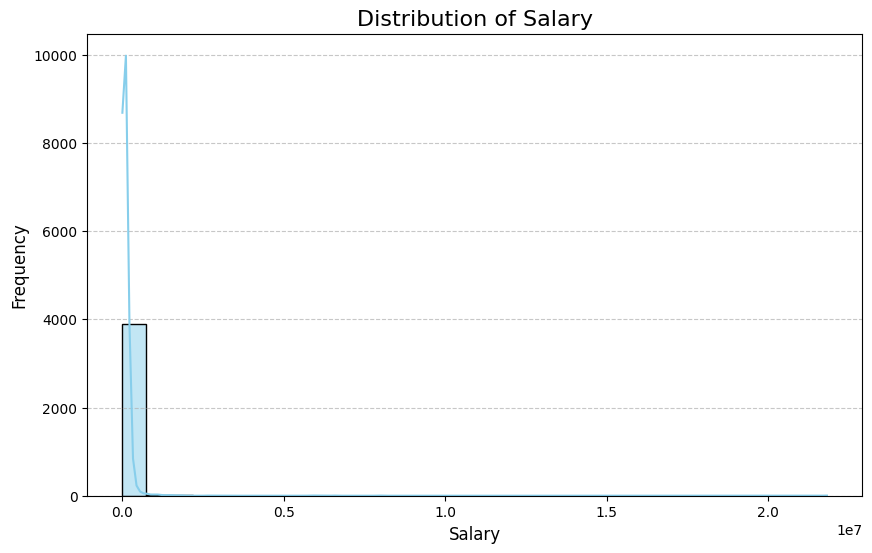

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ConvertedCompYearly'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:

data = data.rename(columns={'ConvertedCompYearly': 'Salary'})
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
if lower_bound < 12000:
    lower_bound = 12000

In [18]:
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]


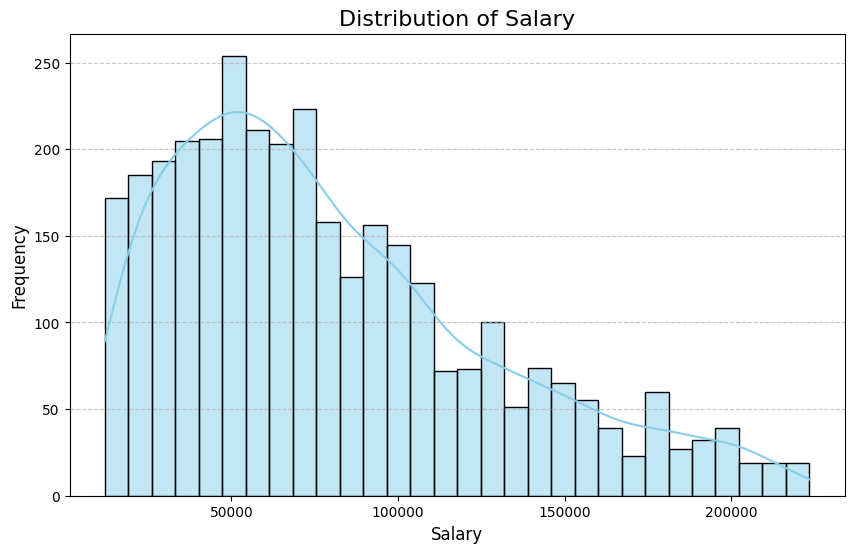

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\780036900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


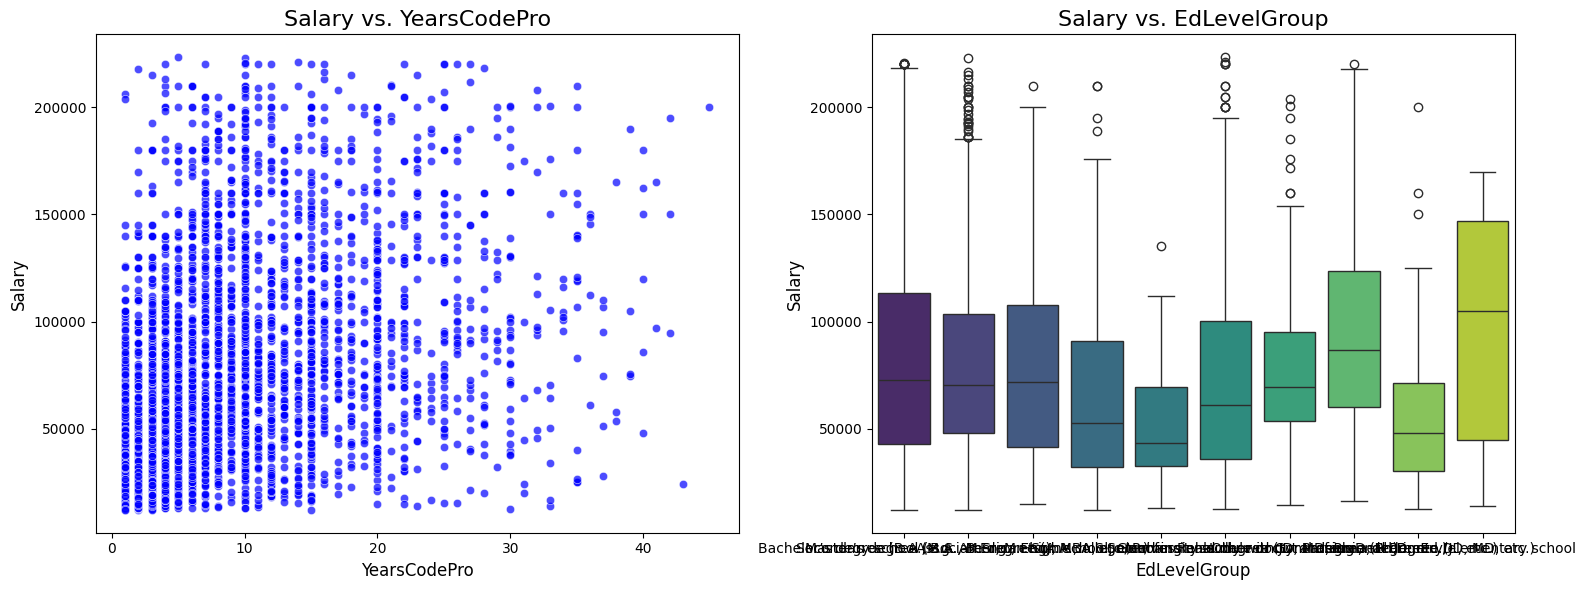

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)
sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [21]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [22]:

invalid_experience = (data['YearsCode'] > data['Age'] - 15) | \
                     (data['YearsCode'] < 0) | \
                     (data['YearsCode'] > 50)|\
                    (data['YearsCodePro'] > data['YearsCode'])

print(f"Số hàng bất hợp lý trong YearsCodePro: {invalid_experience.sum()}")
data = data[~invalid_experience]

Số hàng bất hợp lý trong YearsCodePro: 668


In [23]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [24]:
edlevel_map = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree',
    'Something else': 'Other',
    'Some college/university study without earning a degree': 'Some college',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional degree',
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
    'Professional degree (JD, MD, etc.)': 'Professional degree',
    'Primary/elementary school': 'Primary school'
}

# Thay thế các giá trị trong cột EdLevel bằng nhóm tương ứng
data['EdLevel'] = data['EdLevel'].map(edlevel_map)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\261024034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


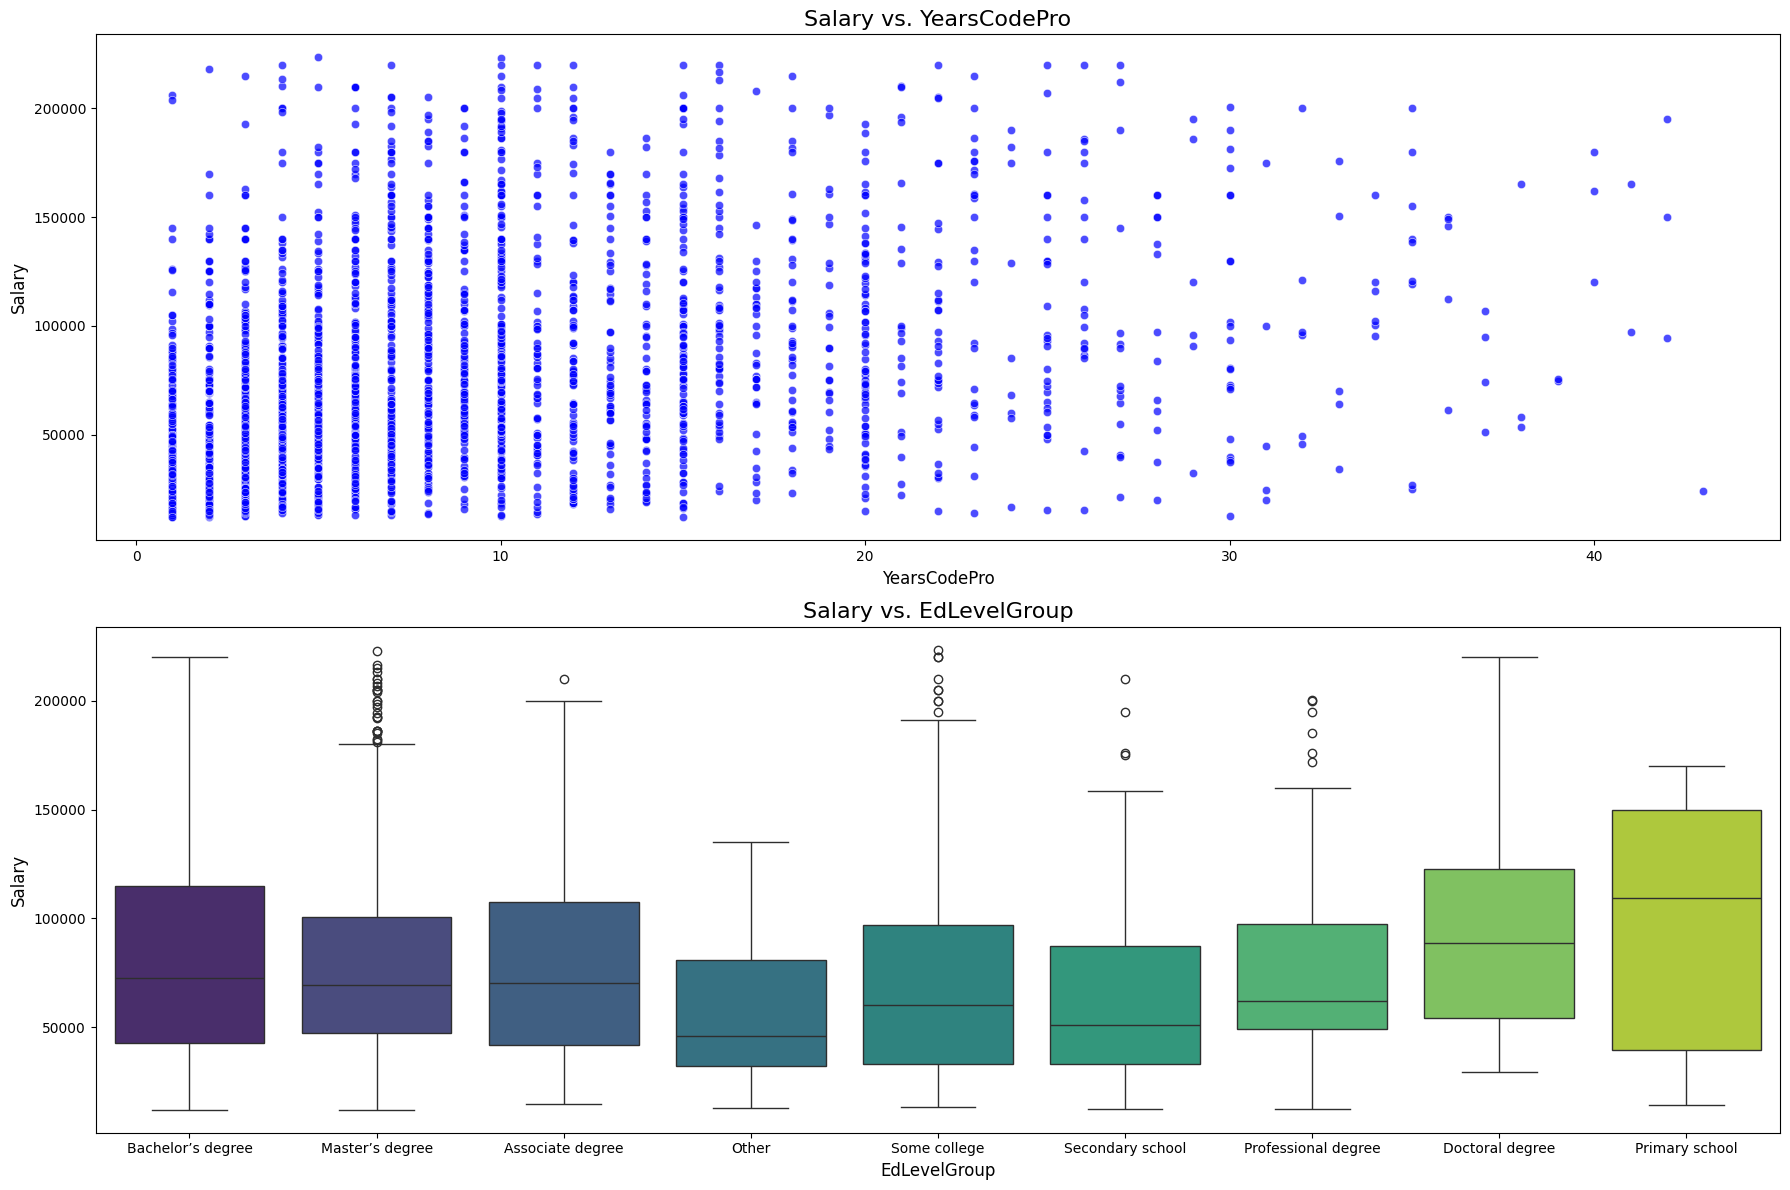

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # Chỉnh số lượng hàng và cột
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)

sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [26]:
data['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Associate degree',
       'Other', 'Some college', 'Secondary school', 'Professional degree',
       'Doctoral degree', 'Primary school'], dtype=object)

Nhớ sửa phần này

In [27]:
primary_school_salary = data[data['EdLevel'] == 'Primary school']

# Xóa tất cả các giá trị lương lớn hơn 10,000 trong nhóm này
data = data[~((data['EdLevel'] == 'Primary school'))] # & (data['Salary'] > 120000))]


C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\1621175164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')


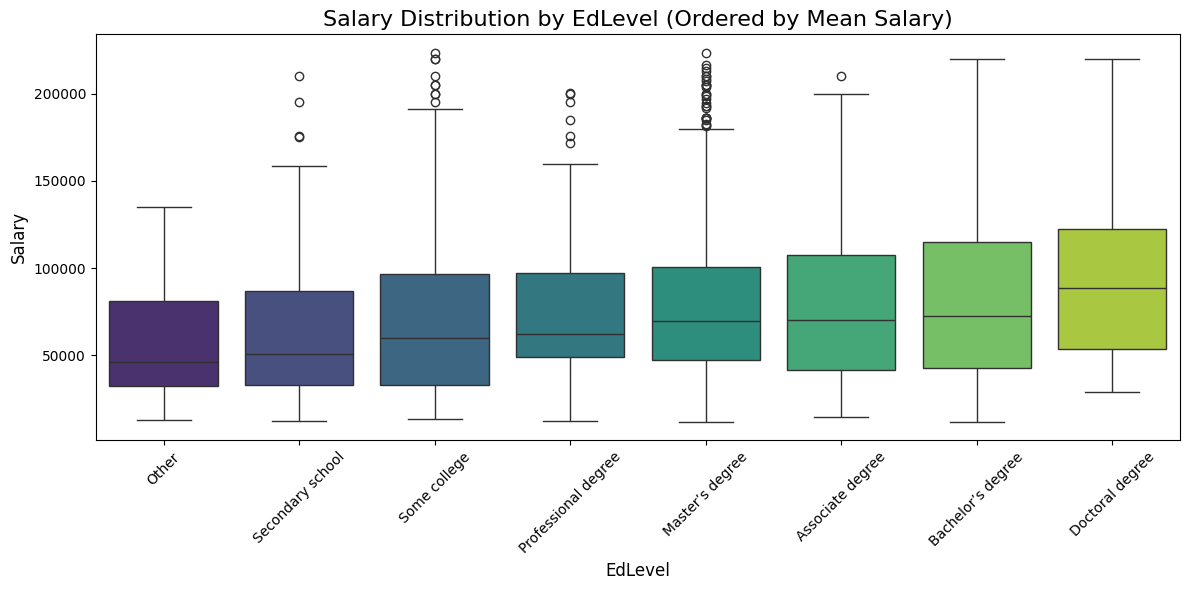

In [28]:
salary_by_edlevel = data.groupby('EdLevel')['Salary'].mean().sort_values()

# Vẽ biểu đồ boxplot với thứ tự các nhóm đã sắp xếp
plt.figure(figsize=(12, 6))
sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')
plt.title('Salary Distribution by EdLevel (Ordered by Mean Salary)', fontsize=16)
plt.xlabel('EdLevel', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# Kiểm tra số lượng mẫu trong mỗi nhóm
data['EdLevel'].value_counts()


EdLevel
Bachelor’s degree      1241
Master’s degree         742
Some college            299
Secondary school        114
Associate degree        102
Professional degree      84
Doctoral degree          38
Other                    27
Name: count, dtype: int64

In [30]:
# data[data['EdLevel'] == 'Primary school']['Salary']

In [31]:
# Kiểm tra các giá trị lương trong nhóm "Primary school"
# primary_school_salary = data[data['EdLevel'] == 'Primary school']['Salary']
# primary_school_salary.describe()


In [32]:
data['DevType'] = data['DevType'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['DevType'] = data['DevType'].str.split(";")

In [33]:
data['DevType']

0                                    [Developer back-end]
1                                  [Developer full-stack]
2                                         [Engineer data]
3                                  [Developer full-stack]
4                                    [Developer back-end]
                              ...                        
3994    [Developer front-end, Developer full-stack, De...
3995                                [Developer front-end]
3997    [Developer full-stack, Developer QA or test, D...
3998                                 [Developer back-end]
3999                               [Developer full-stack]
Name: DevType, Length: 2647, dtype: object

In [34]:
data['Employment']

0                                      Employed full-time
1                                     Employed, full-time
2                                      Employed full-time
3       Employed, full-time;Independent contractor, fr...
4                                     Employed, full-time
                              ...                        
3994                                  Employed, full-time
3995                                  Employed, full-time
3997                                   Employed full-time
3998                                  Employed, full-time
3999                                  Employed, full-time
Name: Employment, Length: 2647, dtype: object

In [35]:
data['Employment'] = data['Employment'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['Employment'] = data['Employment'].str.split(";")

In [36]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3       [Employed full-time, Independent contractor fr...
4                                    [Employed full-time]
                              ...                        
3994                                 [Employed full-time]
3995                                 [Employed full-time]
3997                                 [Employed full-time]
3998                                 [Employed full-time]
3999                                 [Employed full-time]
Name: Employment, Length: 2647, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\3121201441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")


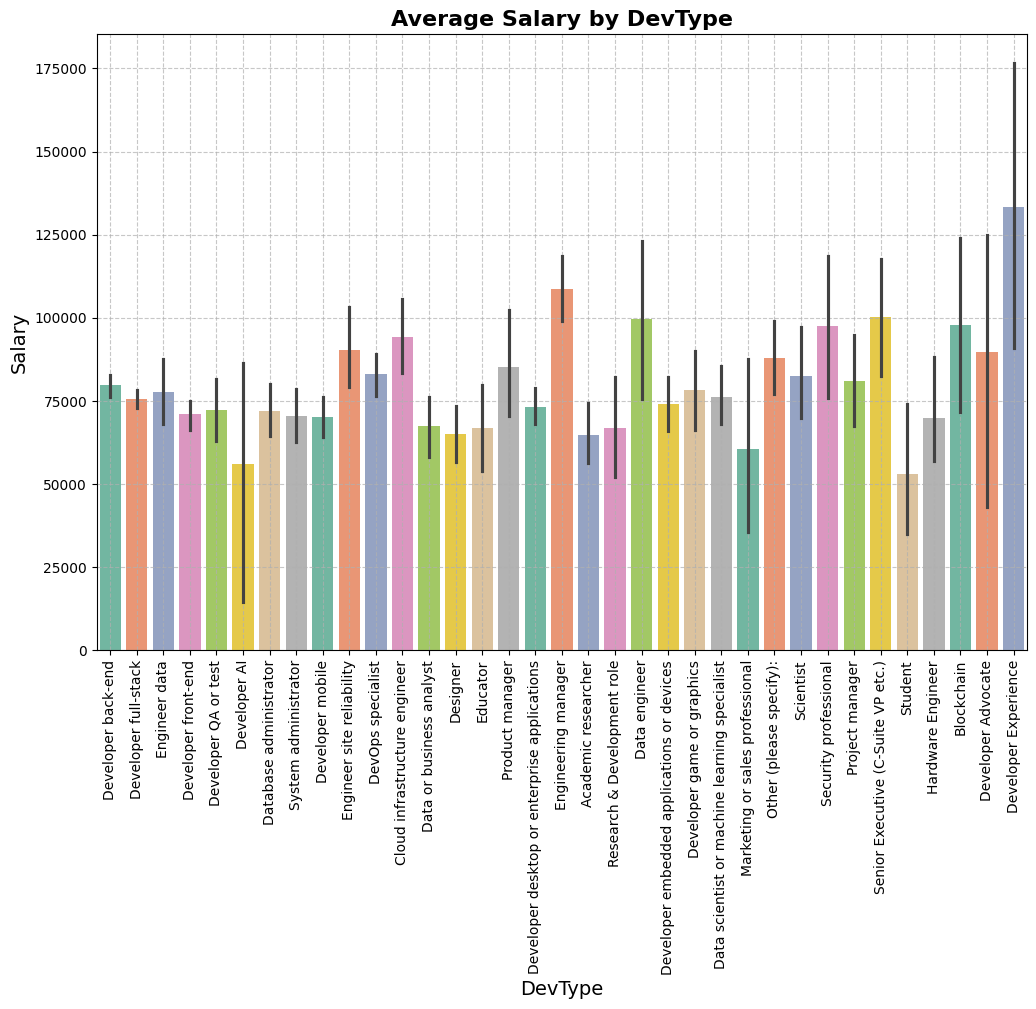

In [37]:
devtype_expanded = data.explode('DevType')
expanded_data = data.explode('DevType')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by DevType', fontsize=16, weight='bold')
plt.xlabel('DevType', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\2829554354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


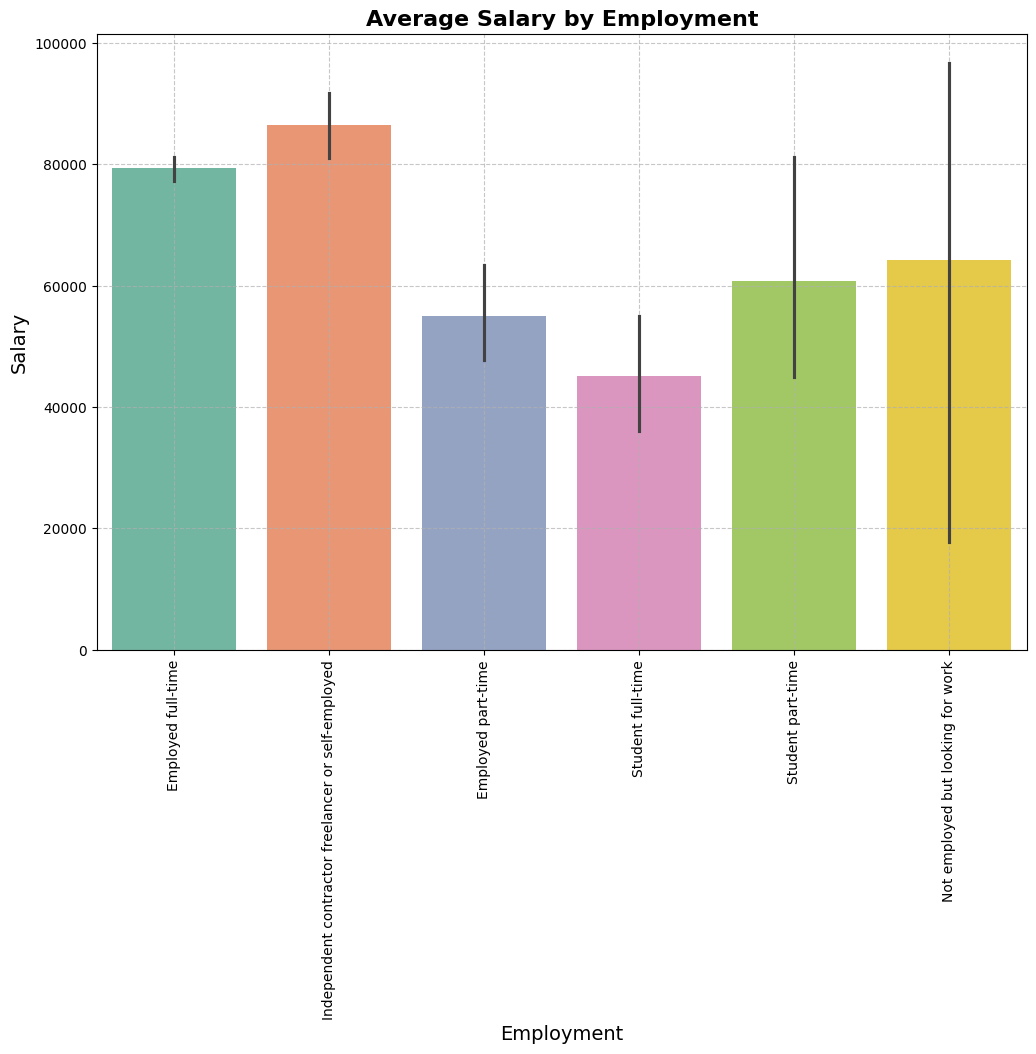

In [38]:

expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

Dữ liệu đang có vấn đề ....

In [39]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3       [Employed full-time, Independent contractor fr...
4                                    [Employed full-time]
                              ...                        
3994                                 [Employed full-time]
3995                                 [Employed full-time]
3997                                 [Employed full-time]
3998                                 [Employed full-time]
3999                                 [Employed full-time]
Name: Employment, Length: 2647, dtype: object

In [40]:
data.drop(data[data['Employment'].apply(lambda x: "Not employed but looking for work" in x)].index, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\310834881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


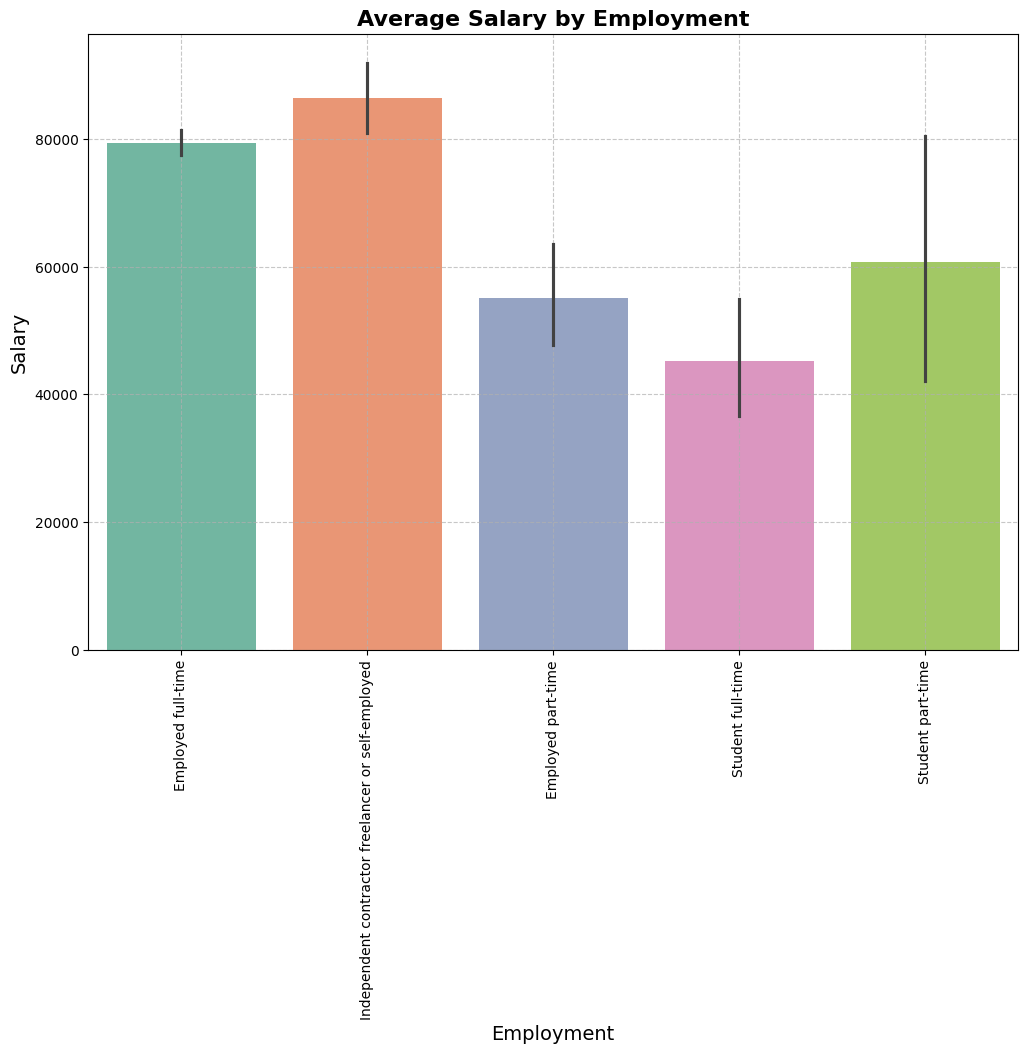

In [41]:
expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

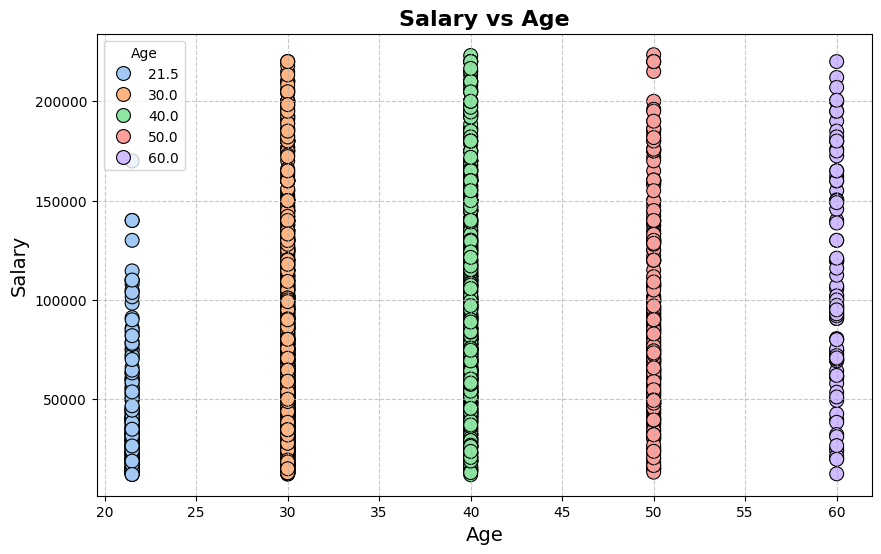

In [42]:
# Cải thiện trực quan của scatterplot
plt.figure(figsize=(10, 6))

# Sử dụng màu sắc nhẹ nhàng cho biểu đồ phân tán
sns.set_palette("pastel")

# Vẽ biểu đồ phân tán giữa Age và Salary
sns.scatterplot(data=data, x='Age', y='Salary', hue='Age', palette='pastel', s=100, edgecolor='black')

# Cải thiện tiêu đề và nhãn
plt.title('Salary vs Age', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Hiển thị lưới nhẹ
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [43]:
# Combine all relevant columns into a single 'skills' column
skills_columns = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",
]

# Remove 'NaN' and combine lists while deduplicating
def combine_skills(row):
    combined = []
    for col in skills_columns:
        if pd.notna(row[col]):  # Check if the column is not NaN
            combined.extend(eval(row[col]))  # Convert string representation of lists to actual lists
    return list(set(combined))  # Remove duplicates

data["skills"] = data.apply(combine_skills, axis=1)

data


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],"['Flask', 'jQuery']","['Docker', 'Git', 'Kubernetes']","[Redis, Bash/Shell, Node.js, Docker, Git, Flas..."
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Docker', 'Gradle', 'Homebrew', 'Kubernetes',...","[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav..."
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],[],[],"[Matlab, Julia, Rust, C++, VBA, C, Python]"
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],"['ASP.NET', 'jQuery']","['Godot', 'MSBuild']","[C#, GDScript, HTML/CSS, Microsoft SQL Server,..."
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],[],"['Cargo', 'npm']","[PostgreSQL, Rust, Amazon Web Services (AWS), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"['Java', 'JavaScript', 'SQL']",['IBM DB2'],[],"['jQuery', 'Node.js', 'Vue.js']","['Docker', 'Homebrew', 'npm', 'Unity 3D']","[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,..."
3995,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript']",[],[],"['Node.js', 'Nuxt.js', 'Vue.js']","['Docker', 'npm', 'Yarn']","[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J..."
3997,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']","['jQuery', 'React.js']","['Docker', 'Git', 'Yarn']","[PostgreSQL, Node.js, Docker, AWS, Git, React...."
3998,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],['Play Framework'],"['Docker', 'Homebrew', 'Kubernetes', 'npm', 'Y...","[Redis, PostgreSQL, Docker, Kubernetes, Bash/S..."


MÔ HÌNH TUYẾN TÍNH: Logistic Regression, Linear Regression, SVM với kernel tuyến tính

In [44]:
data = data.drop(columns = ['LanguageHaveWorkedWith',"DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",])

Mã hóa

In [45]:
df1 = data

In [46]:
df1['DevType']

0                                    [Developer back-end]
1                                  [Developer full-stack]
2                                         [Engineer data]
3                                  [Developer full-stack]
4                                    [Developer back-end]
                              ...                        
3994    [Developer front-end, Developer full-stack, De...
3995                                [Developer front-end]
3997    [Developer full-stack, Developer QA or test, D...
3998                                 [Developer back-end]
3999                               [Developer full-stack]
Name: DevType, Length: 2644, dtype: object

Mã hóa cho DevType

In [47]:
all_dev_types = set([dev for sublist in df1['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df1[dev_type] = df1['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [48]:
df1 

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Engineer data,Blockchain,Developer mobile,Developer AI,Marketing or sales professional,Educator,Product manager,Senior Executive (C-Suite VP etc.),Developer desktop or enterprise applications,Data or business analyst
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0,0,0,0,0,0,0,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,1,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0,0,0,0,0,0,0,0,0,0
3995,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0,0,0,0,0,0,0,0,0,0
3997,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0,0,0,0,0,0,0,0,0,0
3998,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df1 = df1.reset_index(drop=True)

Mã hóa EdLevelGroup

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['EdLevel']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['EdLevel']))

df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Developer desktop or enterprise applications,Data or business analyst,EdLevel_Associate degree,EdLevel_Bachelor’s degree,EdLevel_Doctoral degree,EdLevel_Master’s degree,EdLevel_Other,EdLevel_Professional degree,EdLevel_Secondary school,EdLevel_Some college
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Mã hóa cho Age (dữ liệu trung bình nhóm tuổi vd 18-24 21)

In [52]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,EdLevel_Master’s degree,EdLevel_Other,EdLevel_Professional degree,EdLevel_Secondary school,EdLevel_Some college,Age_21.5,Age_30.0,Age_40.0,Age_50.0,Age_60.0
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
all_employment_types = set([item for sublist in df1['Employment'] for item in sublist])

for employment_type in all_employment_types:
    df1[employment_type] = df1['Employment'].apply(lambda x: 1 if employment_type in x else 0)


In [55]:
df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe,Employed full-time,Student full-time,Student part-time,Independent contractor freelancer or self-employed,Employed part-time
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0


In [56]:
all_skills = set([item for sublist in df1['skills'] for item in sublist])

for skill in all_skills:
    df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\2545966735.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\2545966735.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\2545966735.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [57]:
df1 = df1.drop(columns = ['Country','Age','DevType','Employment','skills'])

In [58]:
df1

,Salary,YearsCode,YearsCodePro,EdLevel,Project manager,Developer front-end,Developer QA or test,Developer game or graphics,Other (please specify):,Developer embedded applications or devices,...,Lua,Couch DB,Prolog,IBM Cloud or Watson,Next.js,Play Framework,Ruby,WordPress,Groovy,MongoDB
0,69804.0,20,13.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,144842.0,10,8.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41363.0,11,5.0,Master’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,25,20.0,Associate degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,25,15.0,Master’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,18,12.0,Master’s degree,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2640,34692.0,6,5.0,Other,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,8,5.0,Bachelor’s degree,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2642,121429.0,18,10.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df1.drop(columns=['EdLevel'])  
y = df1['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df1.iloc[train_idx]
    temp_data = df1.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 2115
Kích thước val: 264
Kích thước test: 265


In [60]:
train_data

,Salary,YearsCode,YearsCodePro,EdLevel,Project manager,Developer front-end,Developer QA or test,Developer game or graphics,Other (please specify):,Developer embedded applications or devices,...,Lua,Couch DB,Prolog,IBM Cloud or Watson,Next.js,Play Framework,Ruby,WordPress,Groovy,MongoDB
20,101311.0,15,5.0,Other,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,64499.0,30,23.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1373,80000.0,6,4.0,Associate degree,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1549,20363.0,15,9.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1524,58992.0,20,14.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,24288.0,12,7.0,Bachelor’s degree,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
580,25860.0,6,1.0,Some college,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
349,15036.0,10,7.0,Bachelor’s degree,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,57999.0,11,6.0,Master’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])


In [63]:
train_data = train_data.drop('EdLevel',axis=1)
val_data = val_data.drop('EdLevel',axis=1)
test_data = test_data.drop('EdLevel',axis=1)

In [64]:
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)

In [65]:
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

In [66]:
X_val

,YearsCode,YearsCodePro,Project manager,Developer front-end,Developer QA or test,Developer game or graphics,Other (please specify):,Developer embedded applications or devices,Engineering manager,Designer,...,Lua,Couch DB,Prolog,IBM Cloud or Watson,Next.js,Play Framework,Ruby,WordPress,Groovy,MongoDB
0,-0.085101,-0.191657,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.204379,-0.058841,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.869117,0.472422,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.204379,-0.058841,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.323656,-0.324472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,-0.800765,-0.457288,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
260,-0.681488,-0.590104,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
261,-0.323656,0.073975,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,1.107671,1.800579,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Linear Regresion

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Linear Regression: {mae}')
print(f'RMSE of Linear Regression: {rmse}')
print(f'R^2 of Linear Regression: {r2}')


MAE of Linear Regression: 26410.66287878788
RMSE of Linear Regression: 34254.94299959209
R^2 of Linear Regression: 0.5172033529175561


SVM với Linear kernel

In [68]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')

svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_val)

# Đánh giá mô hình
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of SVM with Linear Kernel: {mae}')
print(f'RMSE of SVM with Linear Kernel: {rmse}')
print(f'R^2 of SVM with Linear Kernel: {r2}')


MAE of SVM with Linear Kernel: 39149.39817629235
RMSE of SVM with Linear Kernel: 51436.22209775621
R^2 of SVM with Linear Kernel: -0.08856877531613194


Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=21)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Ridge Regression: {mae}')
print(f'RMSE of Ridge Regression: {rmse}')
print(f'R^2 of Ridge Regression: {r2}')


MAE of Ridge Regression: 24806.51980548542
RMSE of Ridge Regression: 31698.363588233107
R^2 of Ridge Regression: 0.586580048101681


In [70]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24376.90784176913
RMSE: 31150.724268128848
R²: 0.6007416163162616


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
svr = SVR(kernel = "rbf", C =2500000, epsilon = 0.02)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24931.66895055182
RMSE: 32663.821873376917
R²: 0.5610129143598196


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=600,learning_rate=0.06,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 205
[LightGBM] [Info] Start training from score 78779.734752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 26410.66287878788
RMSE: 34254.94299959209
R²: 0.5172033529175561


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Thêm các mô hình khác

In [75]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 23204.260825678757
RMSE: 29999.947195241566
R²: 0.6296957235109908


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest

In [76]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


MAE: 27126.986090572107
RMSE: 34670.49053622059
R²: 0.5054186682675527


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=900, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24738.33312871073
RMSE: 31676.45766286122
R²: 0.5871512584913909


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
svr = SVR(kernel = "rbf", C =2000000,epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24931.669724603034
RMSE: 32663.821953220362
R²: 0.5610129122136995


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [79]:
from sklearn.ensemble import BaggingRegressor
lr = LinearRegression()
bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 26189627960799.91
RMSE: 227677418201866.2
R²: -2.1328369841753248e+19


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------------------------------------------

Mô hình dựa trên cây: Decision Tree, Random Forest, XGBoost, LightGBM

In [80]:
df2 = data

Mã hóa

In [81]:
df2 = df2.reset_index(drop=True)

In [82]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [83]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Educator,Product manager,Senior Executive (C-Suite VP etc.),Developer desktop or enterprise applications,Data or business analyst,Age_21.5,Age_30.0,Age_40.0,Age_50.0,Age_60.0
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0


In [84]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df2['Employment'].explode().unique()

array(['Employed full-time',
       'Independent contractor freelancer or self-employed',
       'Employed part-time', 'Student full-time', 'Student part-time'],
      dtype=object)

In [86]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [87]:
from sklearn.preprocessing import MultiLabelBinarizer

# Khởi tạo MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Mã hóa cột DevType
devtype_encoded = mlb.fit_transform(data['DevType'])
# Chuyển đổi kết quả thành DataFrame
devtype_encoded_df = pd.DataFrame(devtype_encoded, columns=mlb.classes_)

# Kết hợp vào dữ liệu gốc
df2 = pd.concat([df2, devtype_encoded_df], axis=1)

df2


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,Senior Executive (C-Suite VP etc.),Student,System administrator
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0,0,0,0,0,0,0,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0,0,0,0,0,0,0,0,0,0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0,0,0,0,0,0,0,0,0,0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df2[df2['EdLevel'] == 'Secondary school']

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,Senior Executive (C-Suite VP etc.),Student,System administrator
52,49056.0,40.0,25,14.0,Germany,Secondary school,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[Docker, HTML/CSS, Java, MySQL, Vue.js, JavaSc...",0,...,0,0,0,0,0,0,0,0,0,0
65,20407.0,30.0,7,2.0,Italy,Secondary school,[Developer back-end],[Employed full-time],"[Laravel, Node.js, NestJS, PHP, WordPress, Nex...",0,...,0,0,0,0,0,0,0,0,0,0
78,80555.0,30.0,10,8.0,Germany,Secondary school,[Developer full-stack],[Employed full-time],"[PostgreSQL, Spring Boot, HTML/CSS, Java, MySQ...",0,...,0,0,0,0,0,0,0,0,0,0
109,36000.0,30.0,13,13.0,United Kingdom of Great Britain and Northern I...,Secondary school,[Developer full-stack],[Employed full-time],"[NuGet, Rust, HTML/CSS, Webpack, Vue.js, Vite,...",0,...,0,0,0,0,0,0,0,0,0,0
125,40944.0,30.0,1,1.0,Czech Republic,Secondary school,[Developer QA or test],[Independent contractor freelancer or self-emp...,"[React, Node.js, Docker, Kubernetes, Homebrew,...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,23803.0,30.0,11,4.0,Viet Nam,Secondary school,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[ASP.NET Core , Node.js, Docker, React.js, Hom...",0,...,0,0,0,0,0,0,0,0,0,0
2504,38916.0,40.0,25,20.0,Germany,Secondary school,"[Developer full-stack, Developer QA or test]",[Employed full-time],"[C#, ASP.NET Core , Git, HTML/CSS, Microsoft S...",0,...,0,0,0,0,0,0,0,0,0,0
2552,50481.0,21.5,6,4.0,Germany,Secondary school,[Developer full-stack],[Employed full-time],"[PostgreSQL, NuGet, Rust, DuckDB, Docker, HTML...",0,...,0,0,0,0,0,0,0,0,0,0
2623,42836.0,30.0,6,3.0,Germany,Secondary school,[Developer back-end],[Employed full-time],"[Redis, Composer, Docker, Symfony, HTML/CSS, P...",0,...,0,0,0,0,0,0,0,0,0,0


In [89]:

from sklearn.preprocessing import OrdinalEncoder

# Áp dụng OrdinalEncoder với thứ tự mới
df2['EdLevel'] = OrdinalEncoder(categories=[[
    'Other',
    'Some college',
    'Secondary school',
    'Professional degree',
    'Master’s degree',
    'Associate degree',
    'Bachelor’s degree',
    'Doctoral degree'
]]).fit_transform(df2[['EdLevel']])



In [90]:
df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,Senior Executive (C-Suite VP etc.),Student,System administrator
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,6.0,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,6.0,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0,0,0,0,0,0,0,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,4.0,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,5.0,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,4.0,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,4.0,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0,0,0,0,0,0,0,0,0,0
2640,34692.0,30.0,6,5.0,Poland,0.0,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,30.0,8,5.0,Australia,6.0,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0,0,0,0,0,0,0,0,0,0
2642,121429.0,40.0,18,10.0,Israel,6.0,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0,0,0,0,0,0,0,0,0,0


Giả sử độ quan trọng của các skills là khác nhau

In [91]:
all_skills = set([item for sublist in df2['skills'] for item in sublist])

for skill in all_skills:
    df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\977187315.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\977187315.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\977187315.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [92]:
df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Project manager,...,Lua,Couch DB,Prolog,IBM Cloud or Watson,Next.js,Play Framework,Ruby,WordPress,Groovy,MongoDB
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,6.0,[Developer back-end],[Employed full-time],"[Redis, Bash/Shell, Node.js, Docker, Git, Flas...",0,...,0,0,0,1,0,0,0,0,1,0
1,144842.0,30.0,10,8.0,Switzerland,6.0,[Developer full-stack],[Employed full-time],"[PostgreSQL, Docker, HTML/CSS, Kubernetes, Jav...",0,...,0,0,0,0,0,0,0,0,1,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,4.0,[Engineer data],[Employed full-time],"[Matlab, Julia, Rust, C++, VBA, C, Python]",0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,5.0,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[C#, GDScript, HTML/CSS, Microsoft SQL Server,...",0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,4.0,[Developer back-end],[Employed full-time],"[PostgreSQL, Rust, Amazon Web Services (AWS), ...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,4.0,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[IBM DB2, Unity 3D, Node.js, Docker, Homebrew,...",0,...,0,0,0,0,0,0,0,0,0,0
2640,34692.0,30.0,6,5.0,Poland,0.0,[Developer front-end],[Employed full-time],"[Node.js, Docker, HTML/CSS, Vue.js, Nuxt.js, J...",0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,30.0,8,5.0,Australia,6.0,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[PostgreSQL, Node.js, Docker, AWS, Git, React....",0,...,0,0,0,0,0,0,0,0,0,1
2642,121429.0,40.0,18,10.0,Israel,6.0,[Developer back-end],[Employed full-time],"[Redis, PostgreSQL, Docker, Kubernetes, Bash/S...",0,...,0,0,0,0,0,1,0,0,1,1


In [93]:
all_employment_types = set([item for sublist in df2['Employment'] for item in sublist])

for employment_type in all_employment_types:
    df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\3202328553.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\3202328553.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20640\3202328553.py:4: PerformanceWarning: DataFrame is highly fragmented.  This i

In [94]:
df2 = df2.drop(columns = ['Country','Age','DevType','Employment'])

In [95]:
df2 = df2.drop('skills',axis=1)

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop(columns=['EdLevel'])  
y = df2['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df2.iloc[train_idx]
    temp_data = df2.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 2115
Kích thước val: 264
Kích thước test: 265


In [97]:
train_data

,Salary,YearsCode,YearsCodePro,EdLevel,Project manager,Developer front-end,Developer QA or test,Developer game or graphics,Other (please specify):,Developer embedded applications or devices,...,Play Framework,Ruby,WordPress,Groovy,MongoDB,Employed full-time,Student full-time,Student part-time,Independent contractor freelancer or self-employed,Employed part-time
2286,182052.0,5,5.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1067,48190.0,9,4.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
779,46899.0,13,8.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2163,31324.0,4,4.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1297,23215.0,11,7.0,6.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,70888.0,13,5.0,6.0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
7,58167.0,10,7.0,6.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,69608.0,10,8.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,51403.0,5,1.0,3.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

In [99]:
X_train

,YearsCode,YearsCodePro,EdLevel,Project manager,Developer front-end,Developer QA or test,Developer game or graphics,Other (please specify):,Developer embedded applications or devices,Engineering manager,...,Play Framework,Ruby,WordPress,Groovy,MongoDB,Employed full-time,Student full-time,Student part-time,Independent contractor freelancer or self-employed,Employed part-time
0,-1.036594,-0.587333,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.561252,-0.721293,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.085910,-0.185454,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.155429,-0.721293,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.323581,-0.319414,6.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,-0.085910,-0.587333,6.0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
2111,-0.442416,-0.319414,6.0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2112,-0.442416,-0.185454,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2113,-1.036594,-1.123173,3.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
numeric_columns = df2.select_dtypes(include=['string'])

In [101]:
numeric_columns

""
0
1
2
3
4
...
2639
2640
2641
2642


In [102]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

YearsCode                                             0
YearsCodePro                                          0
EdLevel                                               0
Project manager                                       0
Developer front-end                                   0
                                                     ..
Employed full-time                                    0
Student full-time                                     0
Student part-time                                     0
Independent contractor freelancer or self-employed    0
Employed part-time                                    0
Length: 404, dtype: int64
0


In [103]:
X_train = X_train.values  # Chuyển đổi DataFrame thành numpy array
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values


In [104]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24714.216389973957
RMSE: 34459.301629304464
R²: 0.5327557768153229


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [105]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [106]:
from xgboost import XGBRegressor
xgb_best = XGBRegressor(
    colsample_bytree=0.9,
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1000,
    subsample=0.5,
    random_state=42
)
xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24381.65153734612
RMSE: 33811.40437617832
R²: 0.5501606767295429


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
svr = SVR(kernel = "rbf", C =2000000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 27928.25822826309
RMSE: 37539.6031662362
R²: 0.44548876195390763


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24338.637354405695
RMSE: 33758.41723750562
R²: 0.5515694926084895


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
bagging_svr = BaggingRegressor(
    estimator=svr,    
    n_estimators=300,       
    max_samples=0.8,       
    max_features=0.8,      
    random_state=42,
    n_jobs=-1              
)

bagging_svr.fit(X_train, y_train)

y_pred = bagging_svr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MemoryError: 